# Proyecto módulo 3

En este notebook te vamos a proponer tres sets de datos para que puedas desarrollar un pequeño proyecto asociado al módulo 3 utilizando los distintos modelos que hemos ido viendo a lo largo del módulo. 

Escoge alguno de los tres sets y utiliza todas las herramientas que has visto en el módulo y en los módulos previos para crear un modelo que resuelva el problema asociado a cada set de datos. 

## Precio de los aguacates [dataset](https://www.kaggle.com/datasets/neuromusic/avocado-prices)

Este set de datos nos permite ver la evolución a lo largo del tiempo del precio de los aguacates en distintos mercados de EEUU y es perfecto para la realización de un análisis de series temporales que ayuden a predecir la evolución de los precios de este alimento


In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")


In [228]:
df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP/20_Proyecto módulo 3/avocado.csv')

In [229]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [230]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [232]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [233]:
df = df.rename({'Unnamed: 0': 'Client Id','4046': 'Small (4046)', '4225': 'Large (4225)', '4770': 'Extra large (4770)'}, axis=1)

In [234]:
df.head()

,Client Id,Date,AveragePrice,Total Volume,Small (4046),Large (4225),Extra large (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c53421f50>,
      dtype=object)

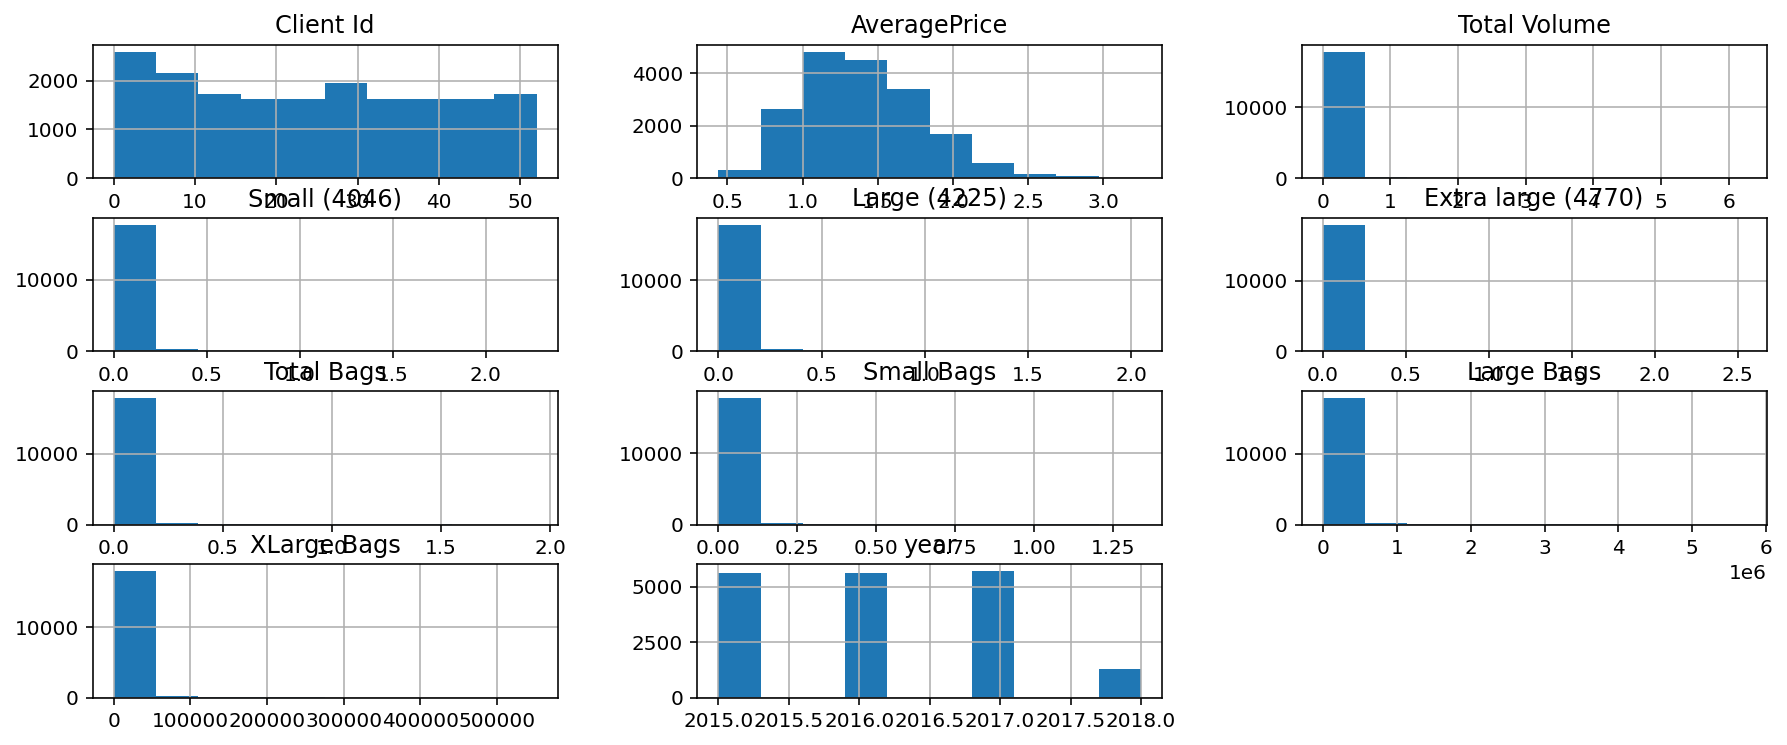

In [235]:
df.hist()

In [236]:
corr = df.corr()
corr.style.background_gradient (cmap = 'bwr')

,Client Id,AveragePrice,Total Volume,Small (4046),Large (4225),Extra large (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,year
Client Id,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
Small (4046),0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
Large (4225),0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
Extra large (4770),0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [237]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m")

In [238]:
df.dtypes

Client Id                      int64
Date                  datetime64[ns]
AveragePrice                 float64
Total Volume                 float64
Small (4046)                 float64
Large (4225)                 float64
Extra large (4770)           float64
Total Bags                   float64
Small Bags                   float64
Large Bags                   float64
XLarge Bags                  float64
type                          object
year                           int64
region                        object
dtype: object

In [239]:
df.head()

,Client Id,Date,AveragePrice,Total Volume,Small (4046),Large (4225),Extra large (4770),Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [240]:
dfi=df.groupby(["Date","Total Volume"]).size()
dfi

Date        Total Volume
2015-01-04  379.82          1
            593.39          1
            1012.61         1
            1339.36         1
            1373.95         1
                           ..
2018-03-25  5134637.05      1
            6687009.44      1
            7667064.46      1
            9010588.32      1
            43409835.75     1
Length: 18249, dtype: int64

In [241]:
dfi=dfi.reset_index()
dfi

,Date,Total Volume,0
0,2015-01-04,379.82,1
1,2015-01-04,593.39,1
2,2015-01-04,1012.61,1
3,2015-01-04,1339.36,1
4,2015-01-04,1373.95,1
...,...,...,...
18244,2018-03-25,5134637.05,1
18245,2018-03-25,6687009.44,1
18246,2018-03-25,7667064.46,1
18247,2018-03-25,9010588.32,1


In [242]:
dfi=dfi.drop_duplicates("Date")

In [243]:
dfi = dfi.set_index('Date')
dfi

,Total Volume,0
Date,,
2015-01-04,379.82,1
2015-01-11,761.86,1
2015-01-18,627.80,1
2015-01-25,711.52,1
2015-02-01,769.05,1
...,...,...
2018-02-25,2430.16,1
2018-03-04,2980.60,1
2018-03-11,2570.52,1


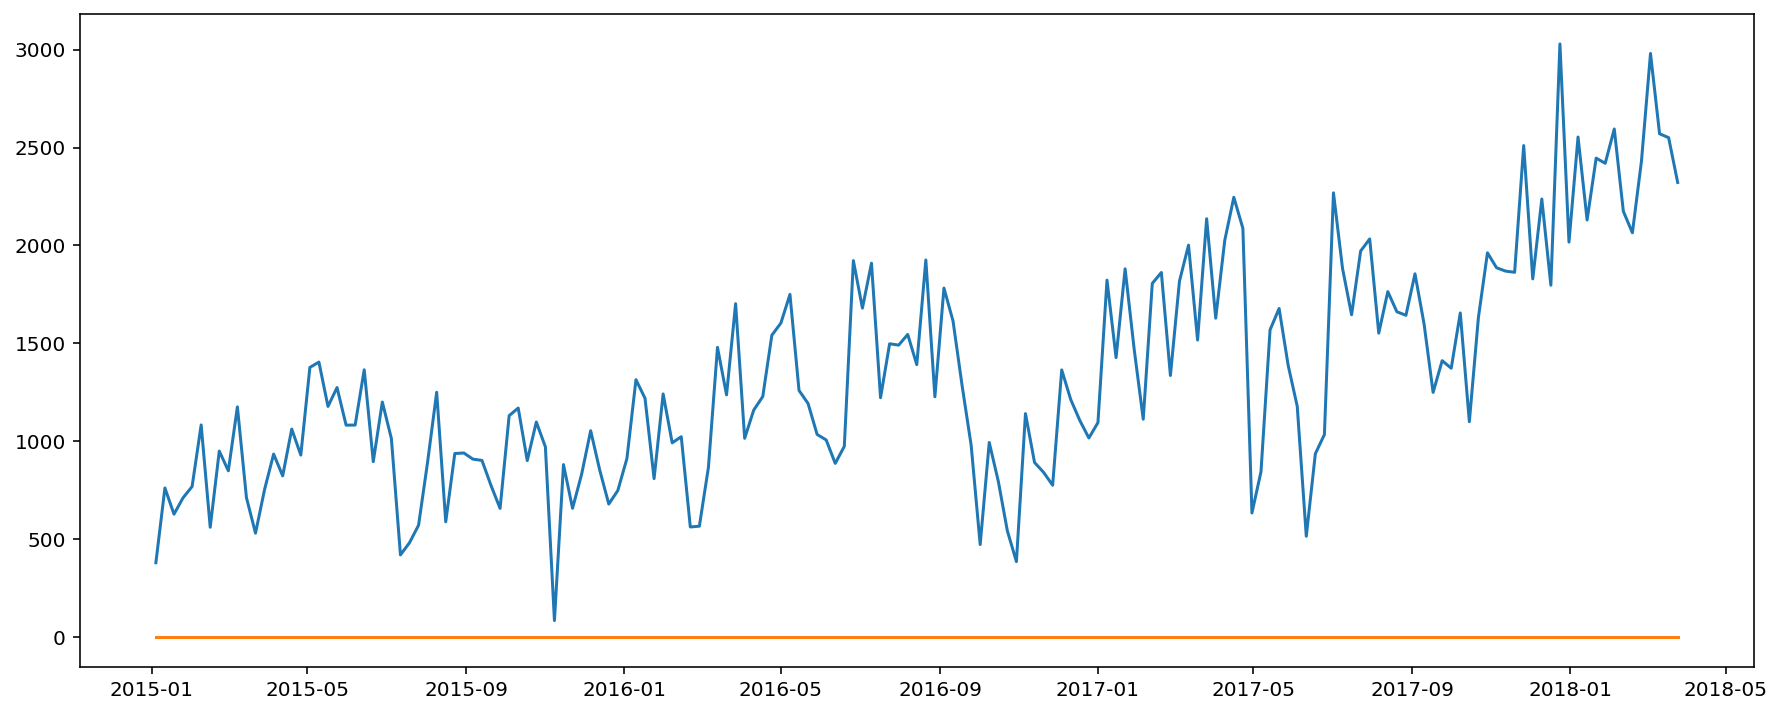

In [244]:
plt.plot(dfi)

In [245]:
# Vamos a comprobar si la serie temporal es estacionaria utilizando una métrica estadística llamada test de Dickey-Fuller


def test_stationarity(timeseries):
    # Determining rolling statistics
    rol_mean = timeseries.rolling(window=12, center=False).mean()
    rol_std = timeseries.rolling(window=12, center=False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(rol_mean, color='r', label='Media acumulada')
    std = plt.plot(rol_std, color='black', label='Desviación típica acumulada')
    plt.legend(loc='best')
    plt.title('Media y desviación típica acumuladas')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Resultados del test Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Usados',
                                             'Número de observaciones usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    print(dfoutput)

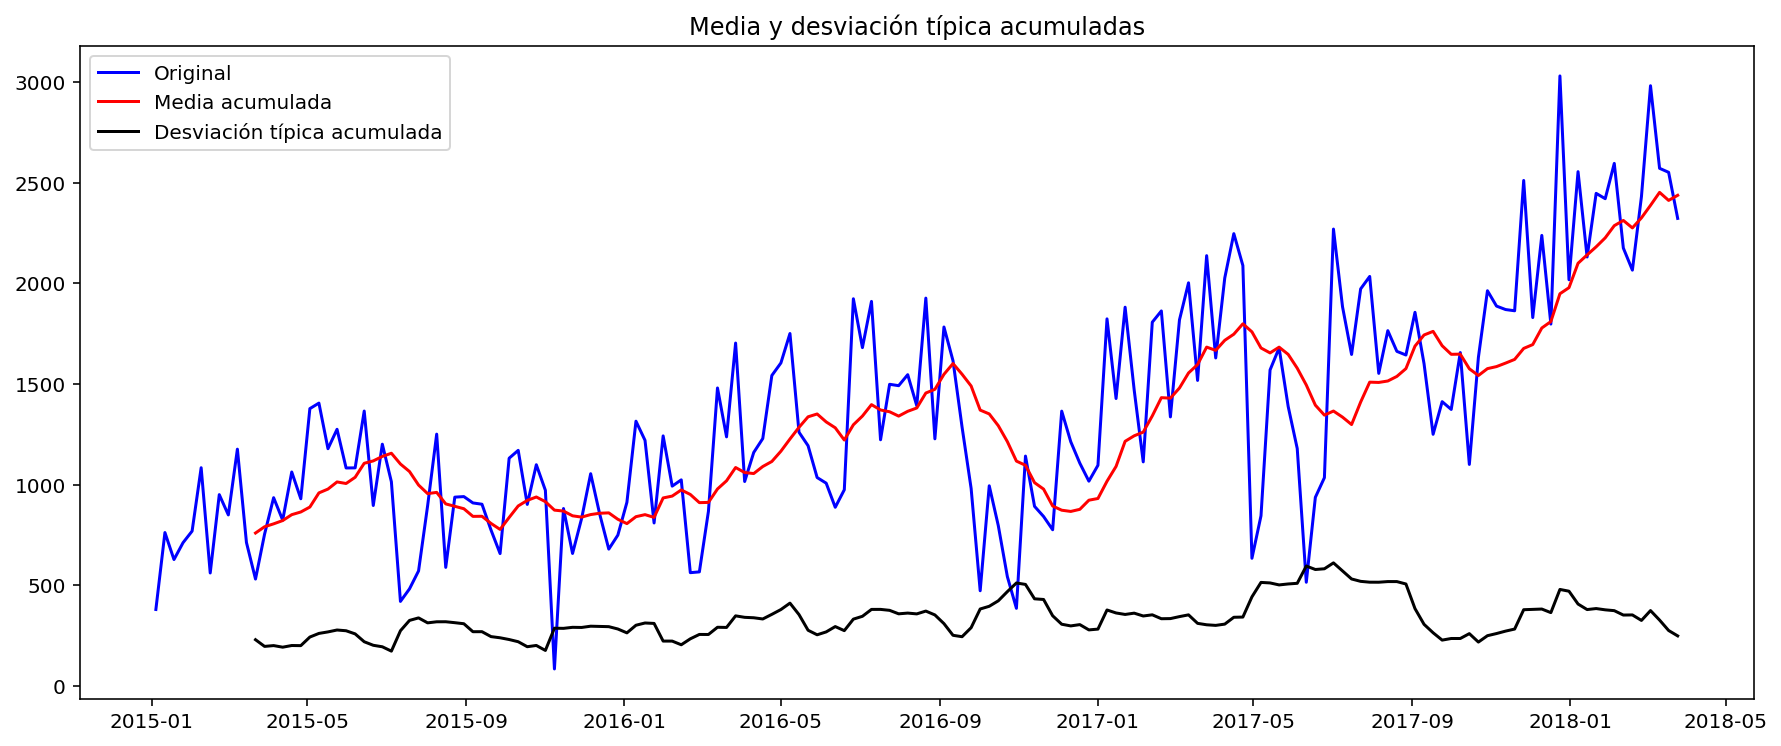

Resultados del test Dickey-Fuller:
Test Statistic                     -1.850661
p-value                             0.355616
#Lags Usados                        3.000000
Número de observaciones usadas    165.000000
Valor crítico (1%)                 -3.470616
Valor crítico (5%)                 -2.879221
Valor crítico (10%)                -2.576197
dtype: float64


In [246]:
test_stationarity(dfi["Total Volume"])

In [247]:
# La serie de datos es estacionaria ya que el test estadistico es menor a los valores críticos , 
# esto podria deberse a el proceso de cultivo y maduración del ahuacate ya
# que para este producto en especifico es en los meses de octubre a diciembre.

In [248]:
# Vamos a crear un modelo ARIMA con los datos

hiperparametros = (2,1,2)
modelo = ARIMA(dfi['Total Volume'],order=hiperparametros)
resultados = modelo.fit(disp=-1)

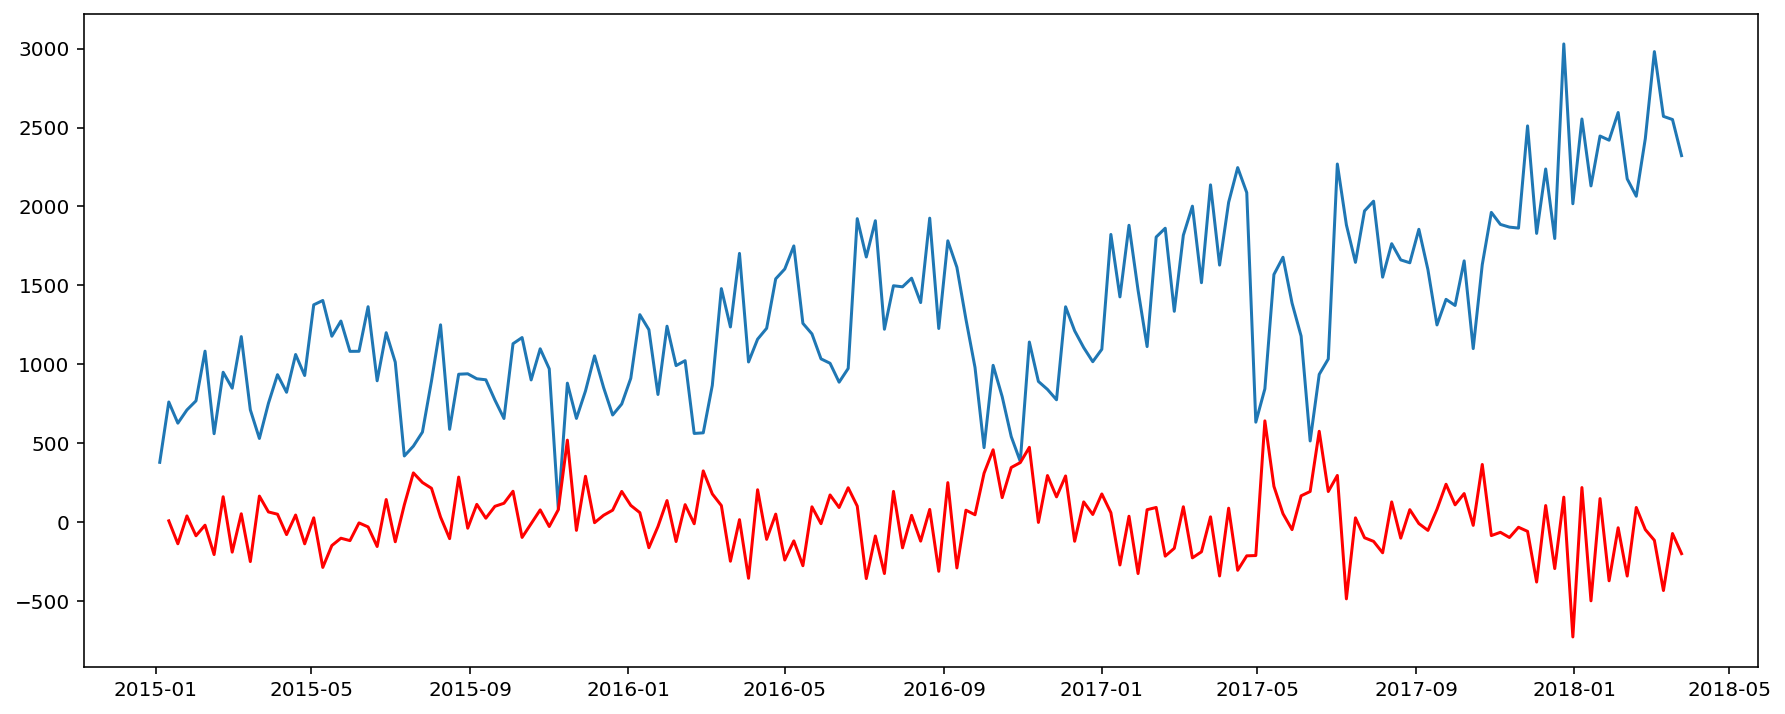

In [249]:
plt.plot(dfi['Total Volume'])
plt.plot(resultados.fittedvalues, color='r')

In [250]:
from fbprophet import Prophet

In [251]:
dfe = pd.read_csv('/content/drive/MyDrive/BOOTCAMP/20_Proyecto módulo 3/avocado.csv')

In [252]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [253]:
# Transformamos los datos para que esten en el formato que espera Prophet
dfe['y'] = dfe['Total Volume']
dfe['ds'] = dfe["Date"]
dfe = dfe.drop(['Date', 'Total Volume'], axis=1)
dfe.head()

,Unnamed: 0,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,y,ds
0,0,1.33,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,64236.62,2015-12-27
1,1,1.35,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,54876.98,2015-12-20
2,2,0.93,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,118220.22,2015-12-13
3,3,1.08,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,78992.15,2015-12-06
4,4,1.28,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,51039.60,2015-11-29


In [254]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  y             18249 non-null  float64
 13  ds            18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [255]:
dfe=dfe.groupby(["y","ds"]).size()
dfe

y            ds        
84.56        2015-11-08    1
379.82       2015-01-04    1
385.55       2016-10-30    1
419.98       2015-07-12    1
472.82       2016-10-02    1
                          ..
46324529.70  2016-05-08    1
47293921.60  2017-05-07    1
52288697.89  2016-02-07    1
61034457.10  2017-02-05    1
62505646.52  2018-02-04    1
Length: 18249, dtype: int64

In [256]:
dfe=dfe.reset_index()
dfe

,y,ds,0
0,84.56,2015-11-08,1
1,379.82,2015-01-04,1
2,385.55,2016-10-30,1
3,419.98,2015-07-12,1
4,472.82,2016-10-02,1
...,...,...,...
18244,46324529.70,2016-05-08,1
18245,47293921.60,2017-05-07,1
18246,52288697.89,2016-02-07,1
18247,61034457.10,2017-02-05,1


In [261]:
dfe=dfe.drop_duplicates("ds")

In [262]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 1304
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       169 non-null    float64
 1   ds      169 non-null    object 
 2   0       169 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.3+ KB


In [263]:
# Vamos a crear nuestro modelo con Prophet
modelo_prophet = Prophet().fit(dfe)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [264]:
# Ahora vamos a pedirle que nos genere predicciones para los siguientes dos años

future = modelo_prophet.make_future_dataframe(periods=730) # A pesar de que nuestros datos son mensuales, Prophet trabaja por defecto con dias y por lo tanto debemos pedirle que nos genere los siguientes 730 dias
predicciones_prophet = modelo_prophet.predict(future)

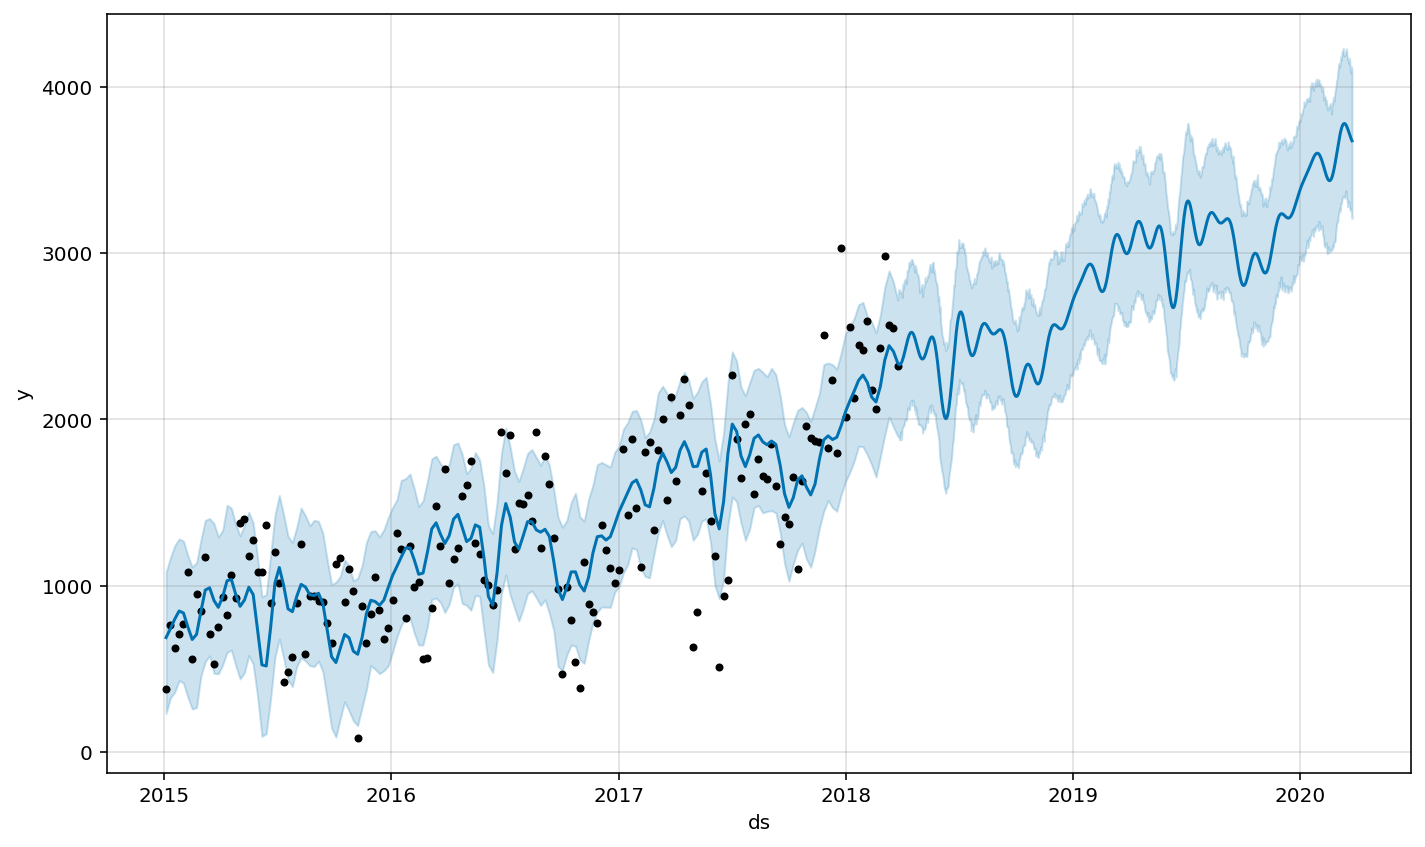

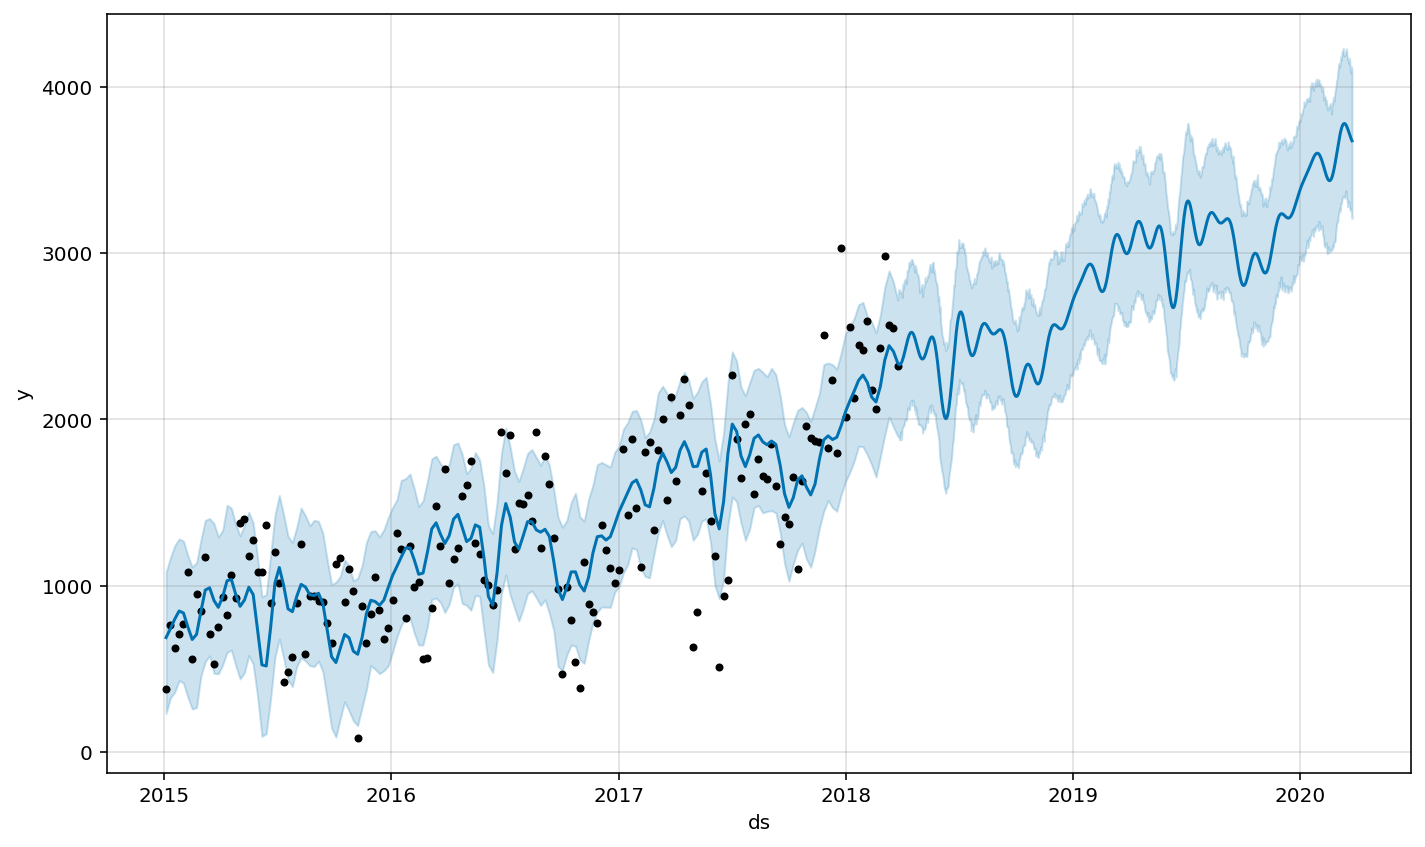

In [265]:
# Vamos a visualizar las predicciones que ha generado Prophet
modelo_prophet.plot(predicciones_prophet)

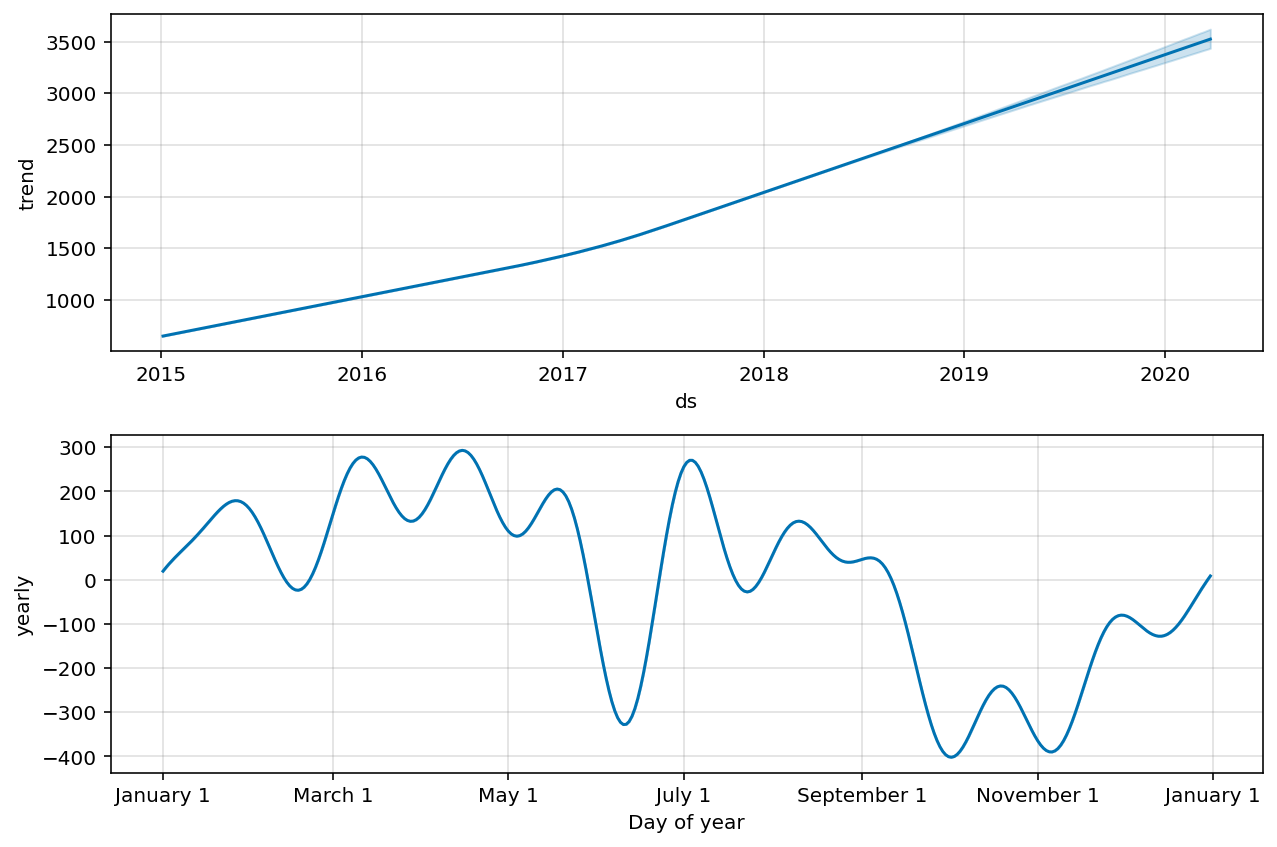

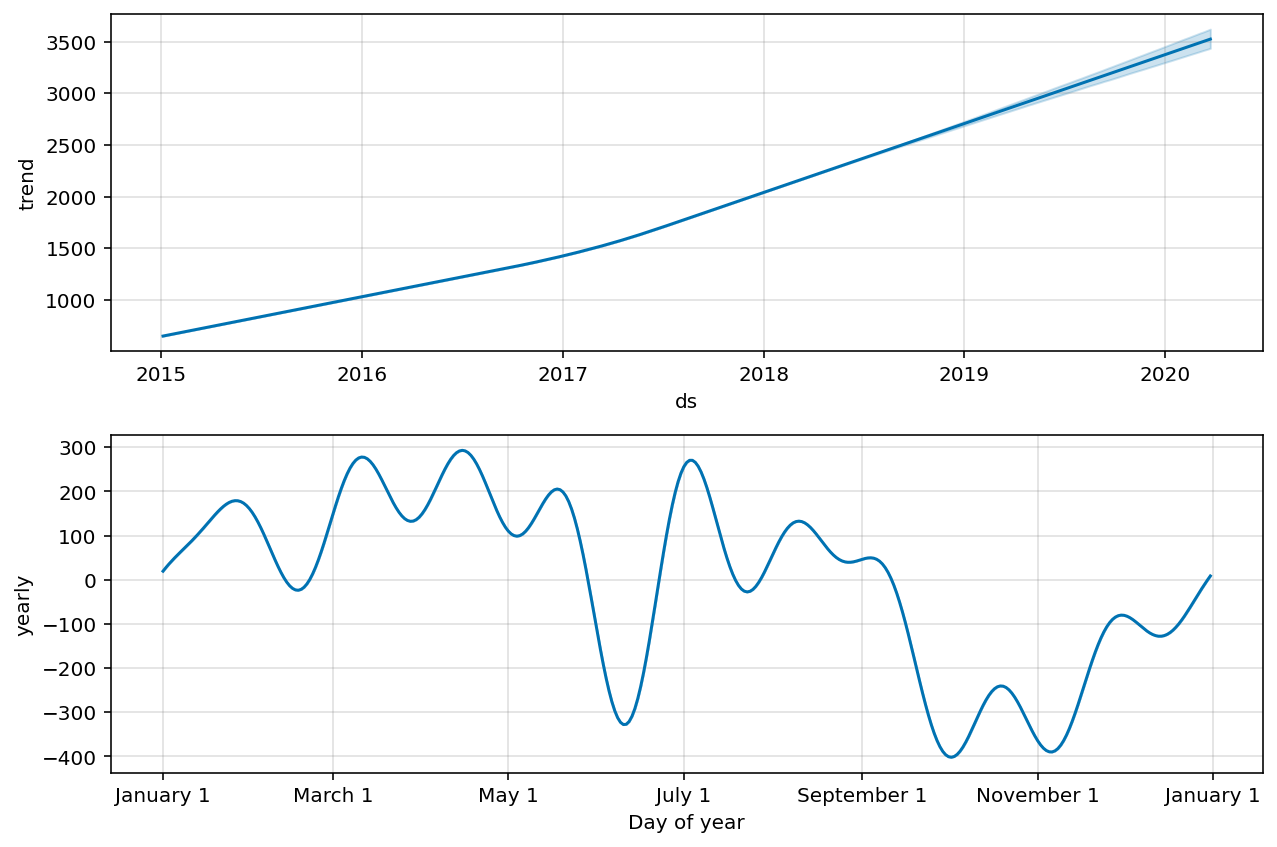

In [266]:
modelo_prophet.plot_components(predicciones_prophet)